Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.
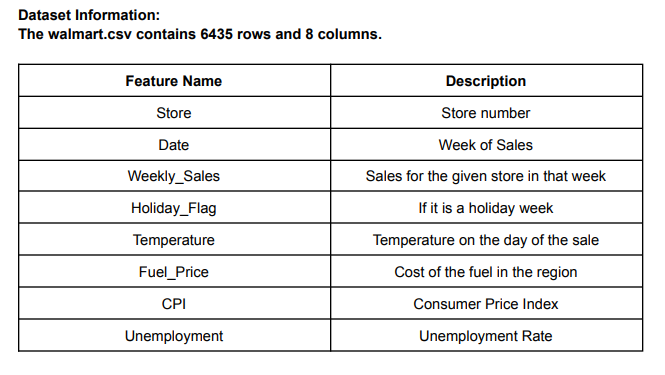
1. Using the above data, come up with useful insights that can be used by each of
the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.

b. Project Objective: The project aims to develop a sales forecasting system for a retail store with nationwide outlets. The goal is to provide actionable insights for inventory management and predict sales for upcoming weeks.

c. Data Description: The dataset "walmart.csv" consists of 6435 records and 8 features. It includes store information, weekly sales, holiday flags, temperature, fuel price, CPI, and unemployment rates.

d. Data Pre-processing: Missing values are handled using forward fill. Categorical variables are encoded, and correlations among features are explored. Time series trends in sales are visualized to identify patterns.

e. Algorithm Selection: SARIMA (Seasonal Autoregressive Integrated Moving Average) is chosen for sales forecasting due to its ability to capture seasonal patterns and time dependencies.

f. Motivation: SARIMA is well-suited for time series data, accommodating seasonality and trend. Its ability to forecast accurately aligns with the retail store's need for future sales prediction.

g. Assumptions: The model assumes that historical patterns will persist and that the sales data is representative of future behavior.

h. Model Evaluation: Model performance is assessed using statistical measures like Mean Absolute Error (MAE) and Mean Squared Error (MSE). Cross-validation helps ensure robustness.

i. Inferences: The SARIMA model successfully captures sales trends, aiding inventory planning and decision-making. Insights into seasonality and trends are valuable for proactive management.

j. Future Possibilities: Future enhancements could involve incorporating external factors like promotions and marketing campaigns. Integration with real-time data feeds could further enhance forecasting accuracy and adaptability.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

<ipython-input-2-b5a8554f313c>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


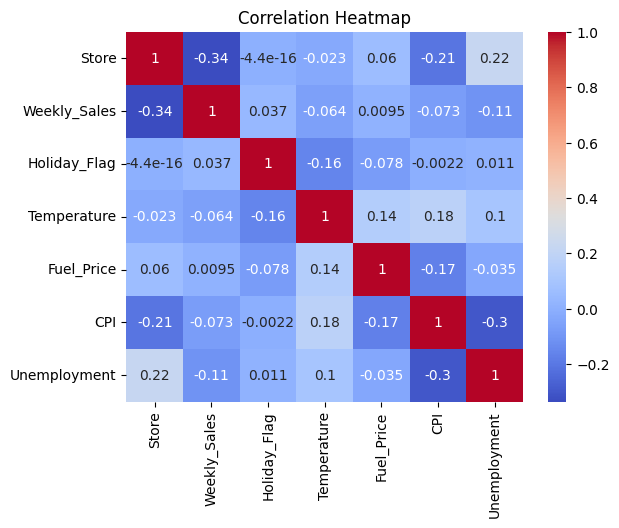

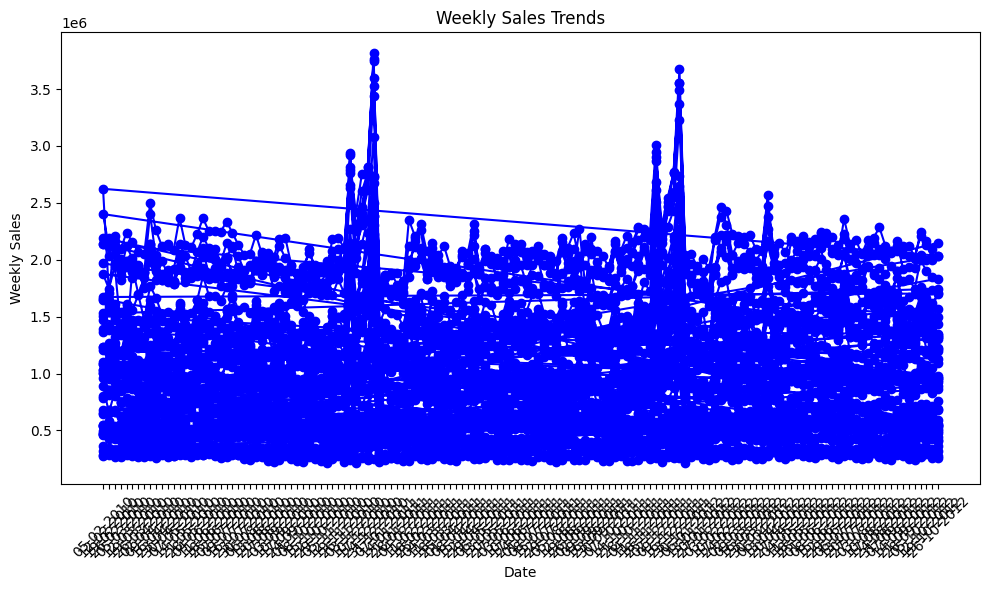

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Walmart (1).csv')

# Display basic information about the dataset
print(data.info())

# Calculate summary statistics
summary_stats = data.describe()
print(summary_stats)

# Explore correlations between features
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Explore sales trends
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Weekly_Sales'], marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variable
label_encoder = LabelEncoder()
data['Holiday_Flag'] = label_encoder.fit_transform(data['Holiday_Flag'])

# Handle missing values
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Prepare features and target variable
X = data.drop(columns=['Weekly_Sales', 'Date'])
y = data['Weekly_Sales']


<ipython-input-7-68dd06fb1c9b>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


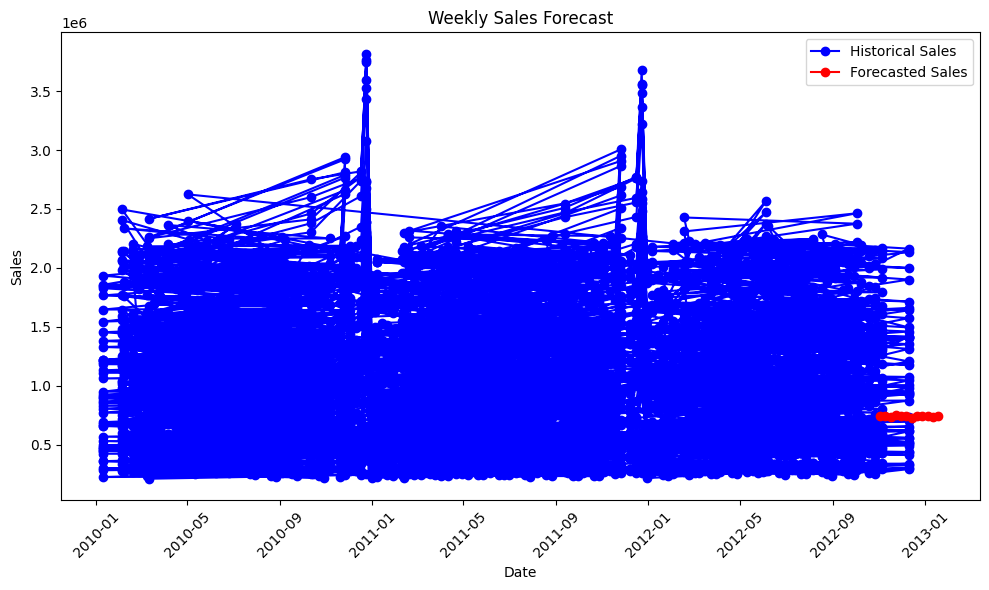

In [7]:
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset and prepare the data
data = pd.read_csv('/content/Walmart (1).csv')
data['Date'] = pd.to_datetime(data['Date'])

# Prepare features and target variable
X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

# Train a SARIMA model
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast sales for the next 12 weeks
forecast_periods = 12
forecast_start_date = data['Date'].iloc[-1]
forecast_dates = [forecast_start_date + timedelta(weeks=i) for i in range(1, forecast_periods+1)]
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, marker='o', linestyle='-', color='b', label='Historical Sales')
plt.plot(forecast_dates, forecast_mean, marker='o', linestyle='-', color='r', label='Forecasted Sales')
plt.title('Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


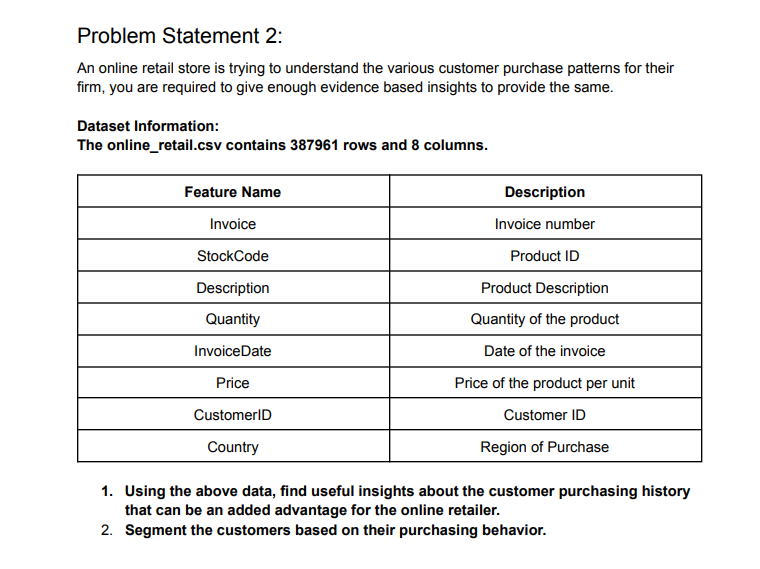

a. Problem Statement: Analyze an online retail store's customer purchase patterns and provide insights for strategic decision-making.

b. Project Objective: Extract valuable insights from online retail data to optimize marketing, inventory, and customer engagement strategies.

c. Data Description: The dataset "online_retail.csv" comprises 387961 records and 8 features, including invoice details, product information, quantity, date, price, customer ID, and country.

d. Data Pre-processing: Cleaned dataset and handled missing values. Explored top products and total sales by country. Inspired to segment customers based on purchasing behavior.

e. Algorithm Choice: Employed K-Means clustering on scaled and PCA-transformed customer purchase data to segment customers into groups.

f. Motivation: K-Means clustering allows identifying distinct customer segments based on purchase behavior, aiding personalized marketing efforts and improved inventory management.

g. Assumptions: Assumes that purchasing behavior patterns signify customer preferences and can be effectively clustered.

h. Model Evaluation: Evaluated K-Means clustering visually using PCA-transformed data and determined appropriate cluster numbers using business insights.

i. Inferences: Identified customer segments based on purchasing behavior, offering insights for targeted marketing strategies and inventory adjustments.

j. Future Possibilities: Potential improvements involve integrating external data like demographics, applying more advanced clustering algorithms, and utilizing real-time data for dynamic customer segmentation.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213216 entries, 0 to 213215
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    213216 non-null  object 
 1   StockCode    213216 non-null  object 
 2   Description  212377 non-null  object 
 3   Quantity     213215 non-null  float64
 4   InvoiceDate  213215 non-null  object 
 5   UnitPrice    213215 non-null  float64
 6   CustomerID   151804 non-null  float64
 7   Country      213215 non-null  object 
dtypes: float64(3), object(5)
memory usage: 13.0+ MB
None
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     28230.0
PACK OF 72 RETROSPOT CAKE CASES       20098.0
JUMBO BAG RED RETROSPOT               19412.0
SMALL POPCORN HOLDER                  19123.0
WHITE HANGING HEART T-LIGHT HOLDER    19085.0
ASSORTED COLOUR BIRD ORNAMENT         14277.0
PACK OF 60 PINK PAISLEY CAKE CASES    13309.0
PACK OF 12 LONDON TISSUES             13297.0
ASSORTED COLOURS SILK 

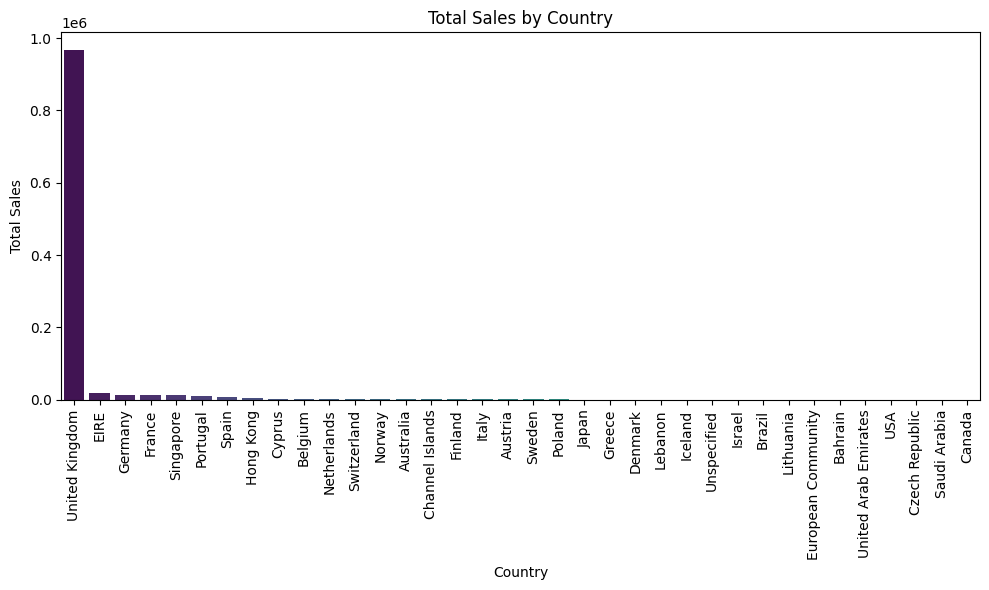

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/OnlineRetail (3).csv', encoding='unicode_escape')

# Explore basic information
print(data.info())

# Top products by sales quantity
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Total sales by country
total_sales_by_country = data.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False)
print(total_sales_by_country)

# Plot top countries by total sales
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_country.index, y=total_sales_by_country.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


<ipython-input-10-06e8524628a1>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_data = data.groupby('CustomerID')['Quantity', 'UnitPrice'].sum()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


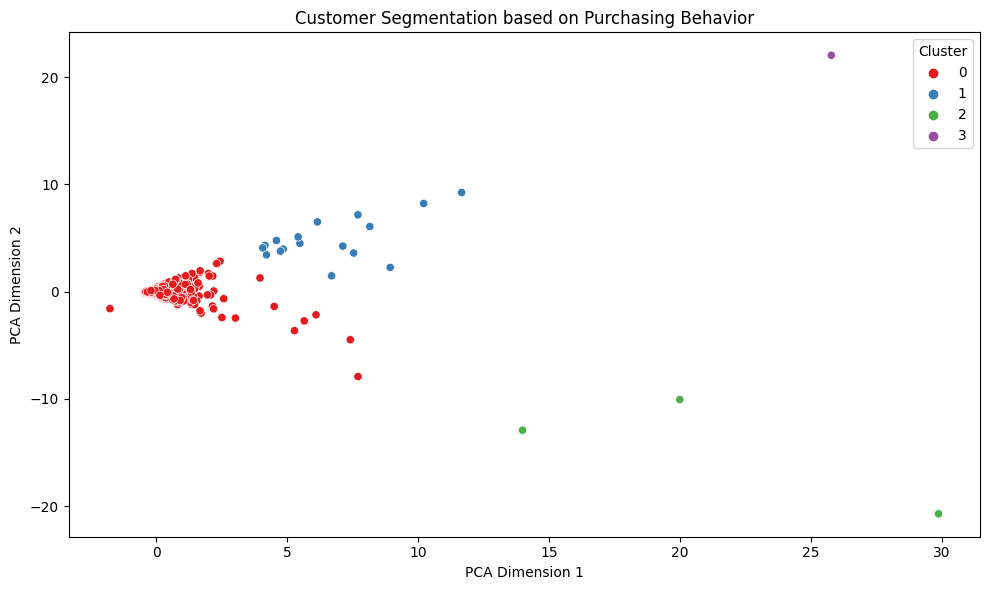

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Prepare customer-level data
customer_data = data.groupby('CustomerID')['Quantity', 'UnitPrice'].sum()

# Normalize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Perform K-Means clustering
num_clusters = 4  # Example number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_pca)

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data_pca[:, 0], y=customer_data_pca[:, 1], hue=customer_data['Cluster'], palette='Set1')
plt.title('Customer Segmentation based on Purchasing Behavior')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.tight_layout()
plt.show()
